# TODO:
Apresentação da proposta de análise de MTG.

## Importando os dados

Para manter esse ambiente mais limpo, e agilizar alguns códigos repetitivos, algumas funções foram definidas no módulo `datasets`, cujo código pode ser encontrado neste projeto.

Caso se interesse em executar esse projeto, siga as instruções contidas no [README](README.md) do projeto.

Utilizaremos a base de dados de cartas de Magic The Gathering, disponibilizada através da API do site [Scryfall](https://scryfall.com/). A base pode ser encontrada no link: [Scryfall Default Cards Dataset](https://data.scryfall.io/default-cards/default-cards-20240216220537.json)

In [2]:
import pandas as pd
import datasets.get_dataset as gd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path = gd.get_file_path()

mtg_dataset = pd.read_json(file_path)

print(mtg_dataset.shape)
(mtg_dataset.head())

(92217, 85)


,object,id,oracle_id,multiverse_ids,mtgo_id,mtgo_foil_id,tcgplayer_id,cardmarket_id,name,lang,...,tcgplayer_etched_id,flavor_name,attraction_lights,color_indicator,printed_type_line,printed_text,variation_of,life_modifier,hand_modifier,content_warning
0,card,0000579f-7b35-4ed3-b44c-db2a538066fe,44623693-51d6-49ad-8cd7-140505caf02f,[109722],25527.0,25528.0,14240.0,13850.0,Fury Sliver,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,card,00006596-1166-4a79-8443-ca9f82e6db4e,8ae3562f-28b7-4462-96ed-be0cf7052ccc,[189637],34586.0,34587.0,33347.0,21851.0,Kor Outfitter,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,card,0000a54c-a511-4925-92dc-01b937f9afad,dc4e2134-f0c2-49aa-9ea3-ebf83af1445c,[],NaN,NaN,98659.0,NaN,Spirit,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,card,0000cd57-91fe-411f-b798-646e965eec37,9f0d82ae-38bf-45d8-8cda-982b6ead1d72,[435231],65170.0,65171.0,145764.0,301766.0,Siren Lookout,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,card,00012bd8-ed68-4978-a22d-f450c8a6e048,5aa12aff-db3c-4be5-822b-3afdf536b33e,[1278],NaN,NaN,1623.0,5664.0,Web,en,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
mtg_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92217 entries, 0 to 92216
Data columns (total 85 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   object               92217 non-null  object        
 1   id                   92217 non-null  object        
 2   oracle_id            92174 non-null  object        
 3   multiverse_ids       92217 non-null  object        
 4   mtgo_id              45944 non-null  float64       
 5   mtgo_foil_id         24632 non-null  float64       
 6   tcgplayer_id         79110 non-null  float64       
 7   cardmarket_id        68881 non-null  float64       
 8   name                 92217 non-null  object        
 9   lang                 92217 non-null  object        
 10  released_at          92217 non-null  datetime64[ns]
 11  uri                  92217 non-null  object        
 12  scryfall_uri         92217 non-null  object        
 13  layout               92217 non-null 

In [4]:
mtg_dataset[['name', 'mana_cost', 'power', 'toughness', 'color_identity']].iloc[0]

name              Fury Sliver
mana_cost              {5}{R}
power                       3
toughness                   3
color_identity            [R]
Name: 0, dtype: object

# Lidando com dados tratados.
É possível ver que são diversos valores no dataset bruto.
Aplicando alguns dos tratamentos que podem ser encontrados nas funções do arquivo [get_dataset.py](datasets\get_dataset.py).

Em alguns casos, haverá redução do tamanho do conjunto de dados. Nesses casos, a redução será descrita.

No dataset inicial temos um conjunto de mais de 92 mil registros.

Usando algumas das funções que já aplicam tratamentos, temos:

In [13]:
mtg = gd.get_flattened_subset()

(mtg.head())

,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,6911.0,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,16425.0,NaN,NaN,NaN,NaN
2,Spirit,,0.0,[W],W,Flying,1,1,Token Creature — Spirit,NaN,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,FlyingExplore,1,2,Creature — Siren Pirate,14267.0,NaN,NaN,NaN,NaN
4,Web,{G},1.0,[G],G,Enchant,NaN,NaN,Enchantment — Aura,22123.0,NaN,NaN,NaN,NaN


In [14]:
mtg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92217 entries, 0 to 92216
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            92217 non-null  object 
 1   mana_cost       89327 non-null  object 
 2   cmc             92174 non-null  float64
 3   colors          89327 non-null  object 
 4   color_identity  92217 non-null  object 
 5   keywords        92217 non-null  object 
 6   power           43296 non-null  object 
 7   toughness       43296 non-null  object 
 8   type_line       92174 non-null  object 
 9   edhrec_rank     80961 non-null  float64
 10  produced_mana   13874 non-null  object 
 11  loyalty         1347 non-null   object 
 12  life_modifier   119 non-null    float64
 13  hand_modifier   119 non-null    float64
dtypes: float64(4), object(10)
memory usage: 10.6+ MB


In [15]:
mtg.value_counts('color_identity')

color_identity
G        13264
W        12923
B        12921
R        12644
U        12477
         12440
GW        1413
BU        1398
UW        1390
BR        1334
GR        1317
RW        1219
GU        1212
BW        1189
RU        1172
BG        1155
BRU        371
BGRUW      355
GRW        298
BUW        276
GUW        261
BGR        253
BGU        182
BRW        182
RUW        181
BGW        167
GRU        161
GRUW        21
BGUW        21
BGRU         7
BRUW         7
BGRW         6
Name: count, dtype: int64

In [16]:
# Pelo visto, o valor que representa as cartas incolores é mostrado apenas como "". Vamos resolver isso.

mtg['color_identity'] = mtg['color_identity'].replace("", "Incolor")

mtg.value_counts('color_identity')

color_identity
G          13264
W          12923
B          12921
R          12644
U          12477
Incolor    12440
GW          1413
BU          1398
UW          1390
BR          1334
GR          1317
RW          1219
GU          1212
BW          1189
RU          1172
BG          1155
BRU          371
BGRUW        355
GRW          298
BUW          276
GUW          261
BGR          253
BRW          182
BGU          182
RUW          181
BGW          167
GRU          161
BGUW          21
GRUW          21
BGRU           7
BRUW           7
BGRW           6
Name: count, dtype: int64

## Começando com algumas perguntas simples de serem respondidas

__1__ - Quais as cores mais comuns no jogo?
Na representação de cores no magic, é comum se referir a cada cor por apenas uma letra. Sendo assim, temos:
- __B__: Black (_Preto_)
- __G__: Green (_Verde_)
- __R__: Red (_Vermelho_)
- __W__: White (_Branco_)
- __U__: Blue (_Azul_)

Além disso, existem também no jogo algumas cartas incolores.

In [17]:
mtg_colors = mtg.groupby('color_identity').size().reset_index(name='count')

total_count = mtg_colors['count'].sum()
mtg_colors['percentage'] = (mtg_colors['count'] / total_count) * 100

(mtg_colors.sort_values('count', ascending=False))

,color_identity,count,percentage
16,G,13264,14.383465
31,W,12923,14.013685
0,B,12921,14.011516
25,R,12644,13.711138
29,U,12477,13.530043
24,Incolor,12440,13.489921
23,GW,1413,1.532255
13,BU,1398,1.515989
30,UW,1390,1.507314
9,BR,1334,1.446588


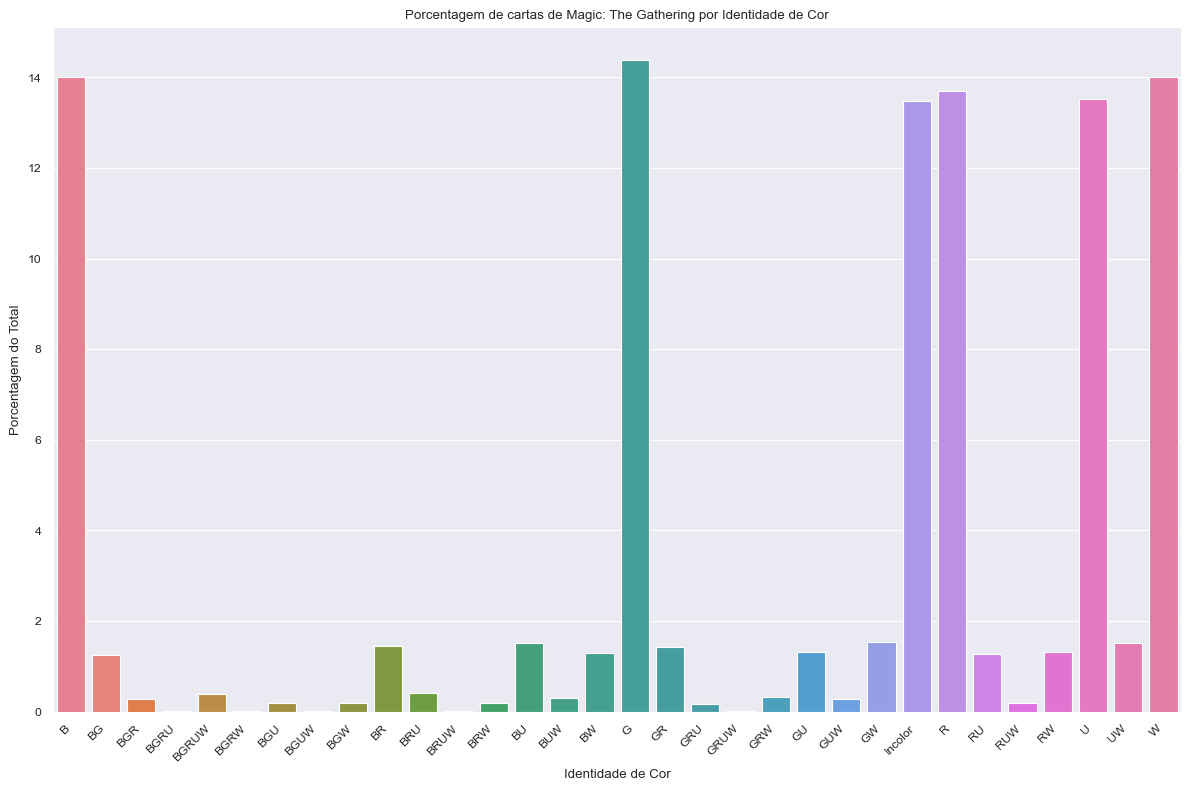

In [18]:
# Quais as cores de cartas mais comuns no jogo?
plt.figure(figsize= (12, 8))

sns.set_theme(style='darkgrid', context='paper')

bars = sns.barplot(
  data=mtg_colors,
  x='color_identity',
  y='percentage',
  hue='color_identity',
  legend=False,
)

sns.despine(bottom=True)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Identidade de Cor')
plt.ylabel("Porcentagem do Total")
plt.title("Porcentagem de cartas de Magic: The Gathering por Identidade de Cor")
plt.tight_layout()

plt.show()

### Agrupando Multicoloridas
As cartas multicoloridas ainda representam, individualmente (por combinação) uma parcela pequena, quando comparadas com as 5 cores (+ Incolores). Por isso, vamos agrupar esses valores em uma categoria "Multicor".
Aproveitando, vamos substituir os valores por `labels` mais amigáveis.

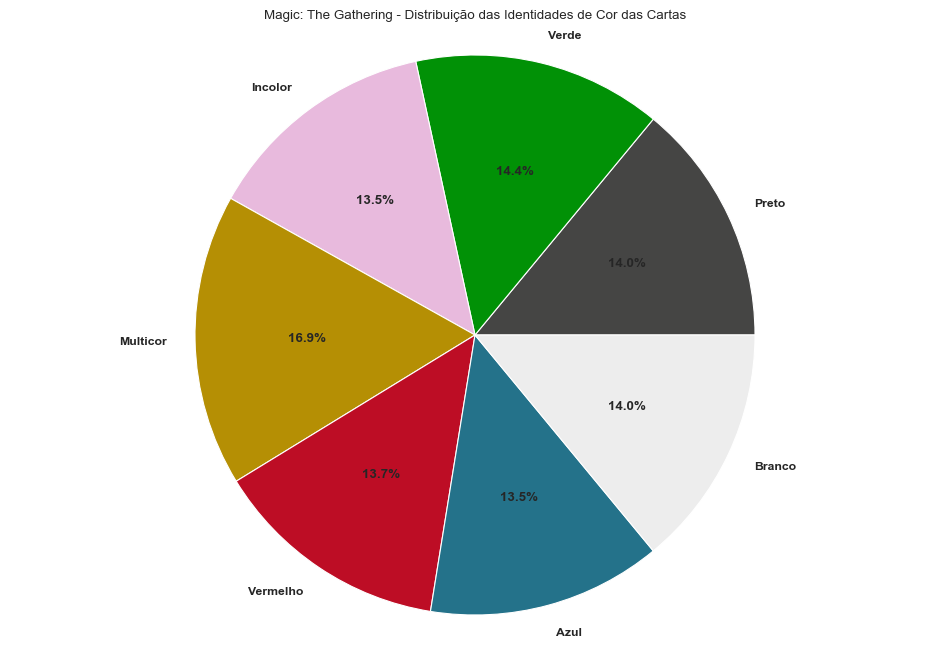

In [19]:
# Agrupando valores menores que 2%
limite = 2

mtg_colors['color_identity'] = mtg_colors.apply(lambda row: row['color_identity'] if row['percentage'] >= limite else 'Multicor', axis = 1)
mtg_multicolor = mtg_colors.groupby('color_identity').sum().reset_index()
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("G", "Verde")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("B", "Preto")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("W", "Branco")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("U", "Azul")
mtg_multicolor['color_identity'] = mtg_multicolor['color_identity'].replace("R", "Vermelho")

colors = {
  "Verde": "#019106",
  "Preto": "#454544",
  "Branco": "#ededed",
  "Azul": "#24728a",
  "Vermelho": "#bd0d25",
  "Multicor": "#b58f04",
  "Incolor": "#e8badd",
}
plt.figure(figsize= (12, 8))

plt.pie(
  mtg_multicolor['percentage'],
  labels=mtg_multicolor['color_identity'],
  autopct='%1.1f%%',
  colors=[colors[label] for label in mtg_multicolor['color_identity']],
  textprops={'fontweight': 'bold'},
)
plt.axis('equal')
plt.title("Magic: The Gathering - Distribuição das Identidades de Cor das Cartas")

plt.show()

## Distribuições de CMC por Cor

In [3]:
mtg = gd.get_flattened_subset()
mtg['color_identity'] = mtg['color_identity'].replace("", "Incolor")

(mtg.head(20))

,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,6911.0,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,16425.0,NaN,NaN,NaN,NaN
2,Spirit,,0.0,[W],W,Flying,1,1,Token Creature — Spirit,NaN,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,FlyingExplore,1,2,Creature — Siren Pirate,14267.0,NaN,NaN,NaN,NaN
4,Web,{G},1.0,[G],G,Enchant,NaN,NaN,Enchantment — Aura,22123.0,NaN,NaN,NaN,NaN
5,Surge of Brilliance,{1}{U},2.0,[U],U,ParadoxForetell,NaN,NaN,Instant,11203.0,NaN,NaN,NaN,NaN
6,Obyra's Attendants // Desperate Parry,{4}{U} // {1}{U},5.0,[U],U,Flying,3,4,Creature — Faerie Wizard // Instant — Adventure,16552.0,NaN,NaN,NaN,NaN
7,Venerable Knight,{W},1.0,[W],W,,2,1,Creature — Human Knight,14589.0,NaN,NaN,NaN,NaN
8,Wildcall,{X}{G}{G},2.0,[G],G,Manifest,NaN,NaN,Sorcery,18062.0,NaN,NaN,NaN,NaN
9,Mystic Skyfish,{2}{U},3.0,[U],U,,3,1,Creature — Fish,23172.0,NaN,NaN,NaN,NaN


In [4]:
# Aplicando o agrupamento de multicoloridas
limite = 2

mtg['color_identity'] = mtg.apply(lambda row: 'Multicor' if len(row['color_identity']) >= limite else row['color_identity'], axis = 1)

(mtg.head(20))

,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,6911.0,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,16425.0,NaN,NaN,NaN,NaN
2,Spirit,,0.0,[W],W,Flying,1,1,Token Creature — Spirit,NaN,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,FlyingExplore,1,2,Creature — Siren Pirate,14267.0,NaN,NaN,NaN,NaN
4,Web,{G},1.0,[G],G,Enchant,NaN,NaN,Enchantment — Aura,22123.0,NaN,NaN,NaN,NaN
5,Surge of Brilliance,{1}{U},2.0,[U],U,ParadoxForetell,NaN,NaN,Instant,11203.0,NaN,NaN,NaN,NaN
6,Obyra's Attendants // Desperate Parry,{4}{U} // {1}{U},5.0,[U],U,Flying,3,4,Creature — Faerie Wizard // Instant — Adventure,16552.0,NaN,NaN,NaN,NaN
7,Venerable Knight,{W},1.0,[W],W,,2,1,Creature — Human Knight,14589.0,NaN,NaN,NaN,NaN
8,Wildcall,{X}{G}{G},2.0,[G],G,Manifest,NaN,NaN,Sorcery,18062.0,NaN,NaN,NaN,NaN
9,Mystic Skyfish,{2}{U},3.0,[U],U,,3,1,Creature — Fish,23172.0,NaN,NaN,NaN,NaN


In [5]:
mtg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92217 entries, 0 to 92216
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            92217 non-null  object 
 1   mana_cost       89327 non-null  object 
 2   cmc             92174 non-null  float64
 3   colors          89327 non-null  object 
 4   color_identity  92217 non-null  object 
 5   keywords        92217 non-null  object 
 6   power           43296 non-null  object 
 7   toughness       43296 non-null  object 
 8   type_line       92174 non-null  object 
 9   edhrec_rank     80961 non-null  float64
 10  produced_mana   13874 non-null  object 
 11  loyalty         1347 non-null   object 
 12  life_modifier   119 non-null    float64
 13  hand_modifier   119 non-null    float64
dtypes: float64(4), object(10)
memory usage: 10.6+ MB


In [8]:
n_rows_55_percent = int(len(mtg) * 0.55)

mtg_reduced = mtg.sample(n=n_rows_55_percent, random_state=42)

(mtg_reduced.info())

<class 'pandas.core.frame.DataFrame'>
Index: 50719 entries, 25948 to 63053
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            50719 non-null  object 
 1   mana_cost       49094 non-null  object 
 2   cmc             50693 non-null  float64
 3   colors          49094 non-null  object 
 4   color_identity  50719 non-null  object 
 5   keywords        50719 non-null  object 
 6   power           23848 non-null  object 
 7   toughness       23848 non-null  object 
 8   type_line       50693 non-null  object 
 9   edhrec_rank     44515 non-null  float64
 10  produced_mana   7564 non-null   object 
 11  loyalty         748 non-null    object 
 12  life_modifier   62 non-null     float64
 13  hand_modifier   62 non-null     float64
dtypes: float64(4), object(10)
memory usage: 5.8+ MB


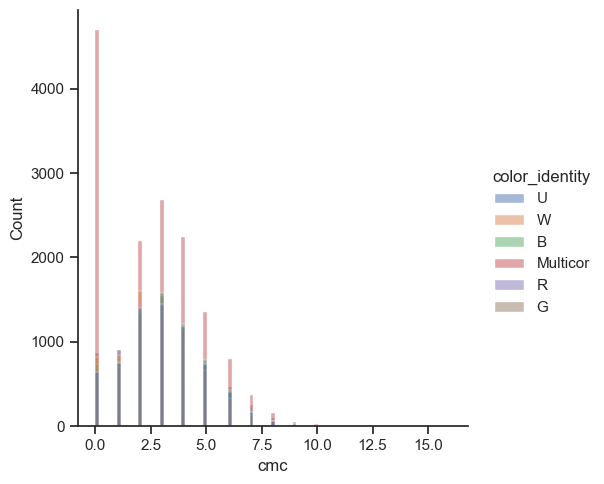

In [9]:
sns.set_theme(style='ticks')

sns.displot(data=mtg_reduced[['cmc', 'color_identity']], x='cmc', hue='color_identity')

plt.show()

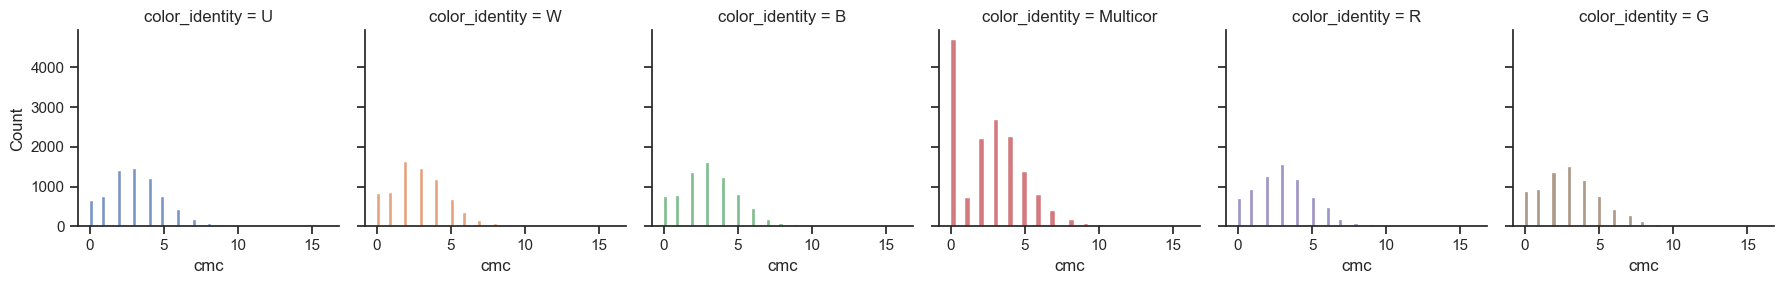

In [14]:
grid = sns.FacetGrid(mtg_reduced, col='color_identity', hue='color_identity')

grid.map(sns.histplot, 'cmc')

plt.show()

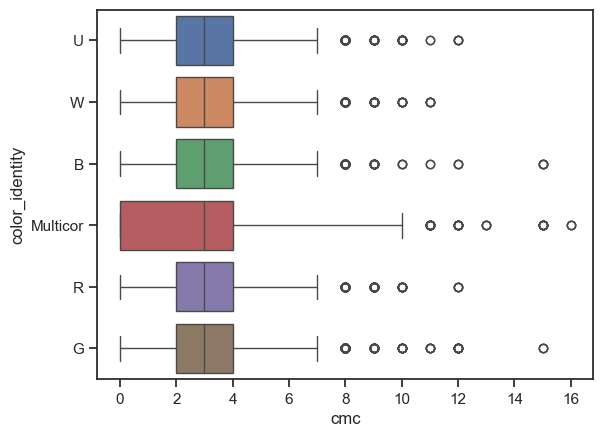

In [11]:
sns.boxplot(
  data=mtg_reduced,
  x='cmc',
  y='color_identity',
  hue='color_identity'
)

plt.show()

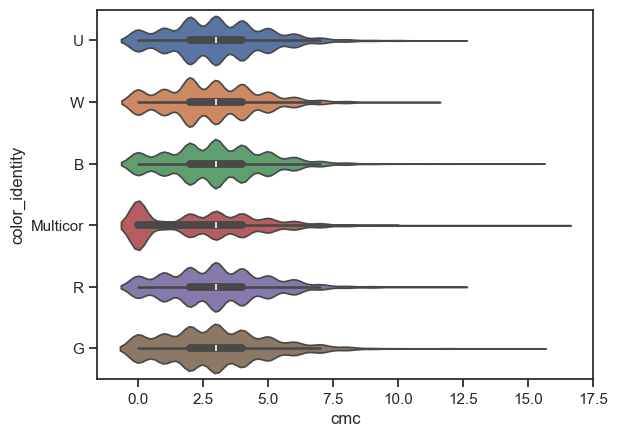

In [12]:
sns.violinplot(
  data=mtg_reduced,
  x='cmc',
  y='color_identity',
  hue='color_identity'
)

plt.show()

# Gráficos de Dispersão e Relação Entre 2+ variáveis numéricas
Para essas situações, a uma função foi definida para reduzir o dataset apenas à variáveis numéricas.
A função `cleaned_dataset` do módulo [get_dataset.py](datasets\get_dataset.py) aplica alguns tratamentos antes de retornar o dataset.

In [15]:
mtg_numeric = gd.cleaned_dataset()

(mtg.head())

,name,mana_cost,cmc,colors,color_identity,keywords,power,toughness,type_line,edhrec_rank,produced_mana,loyalty,life_modifier,hand_modifier
0,Fury Sliver,{5}{R},6.0,[R],R,,3,3,Creature — Sliver,6911.0,NaN,NaN,NaN,NaN
1,Kor Outfitter,{W}{W},2.0,[W],W,,2,2,Creature — Kor Soldier,16425.0,NaN,NaN,NaN,NaN
2,Spirit,,0.0,[W],W,Flying,1,1,Token Creature — Spirit,NaN,NaN,NaN,NaN,NaN
3,Siren Lookout,{2}{U},3.0,[U],U,FlyingExplore,1,2,Creature — Siren Pirate,14267.0,NaN,NaN,NaN,NaN
4,Web,{G},1.0,[G],G,Enchant,NaN,NaN,Enchantment — Aura,22123.0,NaN,NaN,NaN,NaN
